In [2]:
import numpy as np
from scipy.io import wavfile
import wave
import matplotlib.pyplot as plt

In [3]:
filename = "../../Samples/ImperialMarch60.wav"
sample_rate, data = wavfile.read(filename)
n_samples = data.shape[0]

In [4]:
print(f"sample rate {sample_rate}")
print(f"data shape {data.shape}") # samples, dimensions(n channels)
print(f"N samples {n_samples}")
print(f"Duration (seconds): {len(data) / sample_rate : .3f}")

sample rate 22050
data shape (1323000,)
N samples 1323000
Duration (seconds):  60.000


In [5]:
x = data[:, 0] if len(data.shape) > 1 else data
time = [i/sample_rate for i in range(len(x))]

In [6]:
print([x[i] for i in range(220500, 220510)])

[1583, 1223, 256, -1064, -1909, -2019, -1914, -1822, -1436, -794]


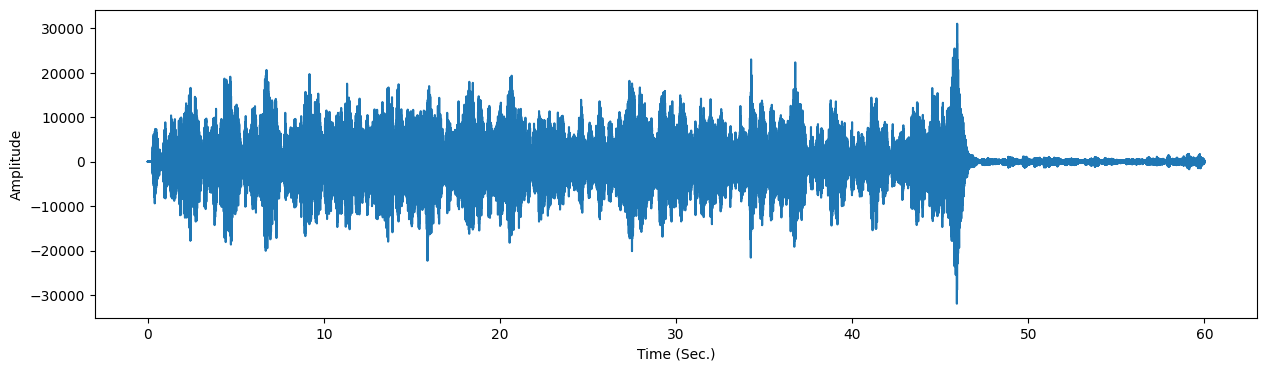

In [7]:
plt.figure(figsize=(15, 4))
plt.plot(time, x)
plt.xlabel('Time (Sec.)')
plt.ylabel('Amplitude')
plt.show()

## FFT Step

In [8]:
from numpy.fft import fft, ifft, fftfreq, fftshift, rfft, irfft, ifftshift

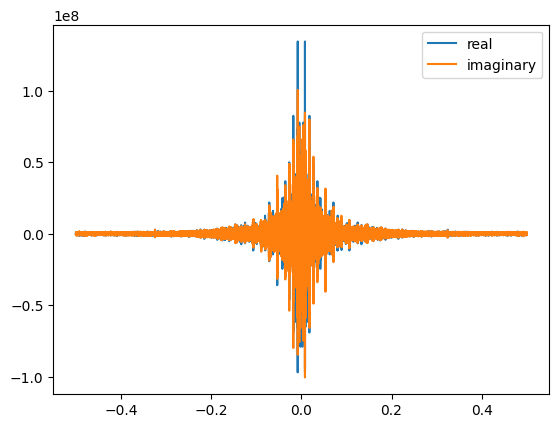

In [9]:
x_fft = fft(x) # Fast fourier transform w/ real & imaginary components
fft_sample_frequencies = fftfreq(x.size) # DFT sample frequencies
plt.plot(fft_sample_frequencies, x_fft.real, label='real')
plt.plot(fft_sample_frequencies, x_fft.imag, label='imaginary')
plt.legend()
plt.show()

In [10]:
x_fft[:10]

array([-3940134.            +0.j        ,
          36385.5242714 -34742.79645563j,
          30275.73457158+16068.67813281j,
         -11773.61116817+29835.97099765j,
          17142.60180246+37513.34616493j,
          43865.07035345+11795.97714955j,
          38230.58920964+25617.2438069j ,
          39265.89630554+12437.4371467j ,
          25379.29330061 +2063.13735197j,
          22495.9500448  -8351.6979458j ])

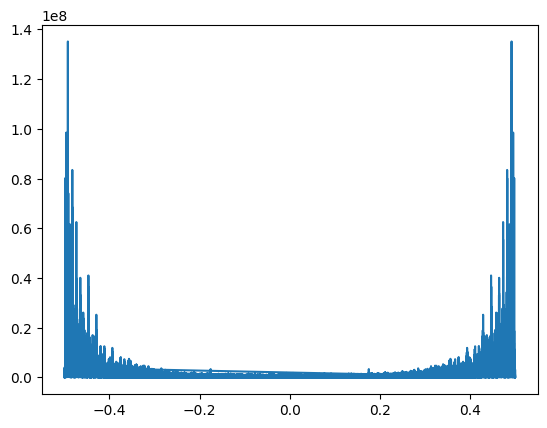

In [11]:
x_fft_shifted = fftshift(fft(x, n_samples))
x_fft_freq = fftfreq(x.size)
plt.plot(x_fft_freq, abs(x_fft_shifted))

In [12]:
with open('../Testing/py_fft_magnitude.txt', 'w') as f:
    for m, deg in zip(abs(x_fft_shifted), np.angle(x_fft_shifted)):
        f.write(f"{m}\t{deg}\n");

## Embedding Step

In [13]:
text = "my name is slim shady"
# convert to binary
bin_text = bin(int.from_bytes(text.encode(), 'big'))[2:]
print(bin_text)

11011010111100100100000011011100110000101101101011001010010000001101001011100110010000001110011011011000110100101101101001000000111001101101000011000010110010001111001


In [14]:
# Starting embedding
frame = len(bin_text) # total length of bits to embed
embed_sample_sz = 10 # number of samples used to embed each bit
p = frame*embed_sample_sz # total number of samples used for embedding data
centre = n_samples/2+1 #centre frequency/ zero point
embedding_freq = 5000 # in hz

X_abs = abs(x_fft_shifted) # positive values of fft
X_angle = np.angle(x_fft_shifted) # angle of each point in fft

Y = X_abs
X_embed = X_abs[int(centre - embedding_freq - p):int(centre - embedding_freq)]

a = 0.1 # amplification factor of embedding

x_mat = X_embed.reshape(frame, embed_sample_sz) # split by 
x_mat.shape

(167, 10)

In [15]:
# # Embedding algorithm loop
# for k in range(frame):
#     avg = 0
    
#     for l in range(embed_sample_sz): # take average of 10 samples
#         avg = avg + X_embed[k*embed_sample_sz + l]
#     avg = avg / embed_sample_sz
    
#     if bin_text[k] == '0': # bit to encode is '0'
#         print('0', end = ' ')
#         for l in range(embed_sample_sz):
#             X_embed[k*embed_sample_sz + l] = avg # set all 10 samples to same avg value - indicates 0

#     else: # when bit is '1'
#         print('1', end=' ')
#         for l in range(int(embed_sample_sz/2)): # from 0 to 4
#             X_embed[k*embed_sample_sz + l] = a*avg # set first half to 0.1*avg
#         for l in range(int(embed_sample_sz/2), embed_sample_sz): # 5 to 10
#             X_embed[k*embed_sample_sz + l] = (2-a)*avg # 2nd half to 1.9*avg

# Embedding algorithm loop
for k in range(frame):
    avg = 0
    
    for l in range(embed_sample_sz): # take average of 10 samples
        avg = avg+x_mat[k][l]
    avg = avg/embed_sample_sz
    
    if bin_text[k] == '0': # bit to encode is '0'
        print('0', end = ' ')
        for l in range(embed_sample_sz):
            x_mat[k][l] = avg # set all 10 samples to same avg value - indicates 0

    else: # when bit is '1'
        print('1', end=' ')
        for l in range(int(embed_sample_sz/2)): # from 0 to 4
            x_mat[k][l] = a*avg # set first half to 0.1*avg
        for l in range(int(embed_sample_sz/2), embed_sample_sz): # 5 to 10
            x_mat[k][l] = (2-a)*avg # 2nd half to 1.9*avg

1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 

In [16]:
# Add embeddings to full data
#x_vec = x_mat.reshape(p) # bring it back to vector/array
x_vec = X_embed

# define range for adding embeddings back to final fft vec with embeddings
range_embed_1 = range(int(centre-embedding_freq-p), int(centre-embedding_freq))
range_embed_2 = range(int(centre+embedding_freq+1), int(centre+embedding_freq+p+1))

print("p =", p)
print("centre =", centre)
print("embedding_freq =", embedding_freq)
print("Embedding range 1: [{}, {}]".format(range_embed_1[0], range_embed_1[1]))
print("Embedding range 2: [{}, {}]".format(range_embed_2[0], range_embed_2[1]))

Y[range_embed_1] = x_vec
Y[range_embed_2] = x_vec[::-1] # reversed x_vec for symmetry

p = 1670
centre = 661501.0
embedding_freq = 5000
Embedding range 1: [654831, 654832]
Embedding range 2: [666502, 666503]


In [17]:
with open('../Testing/py_fft_magnitude_altered.txt', 'w') as f:
    for m, deg in zip(abs(Y), np.angle(Y)):
        f.write(f"{m}\t{deg}\n");

In [25]:
Y1 = np.multiply(Y, np.exp(1j*X_angle)) # embedded signal with phase information

In [26]:
with open('../Testing/py_Y1.txt', 'w') as f:
    for m, deg in zip(abs(Y1), np.angle(Y1)):
        f.write(f"{m}\t{deg}\n");

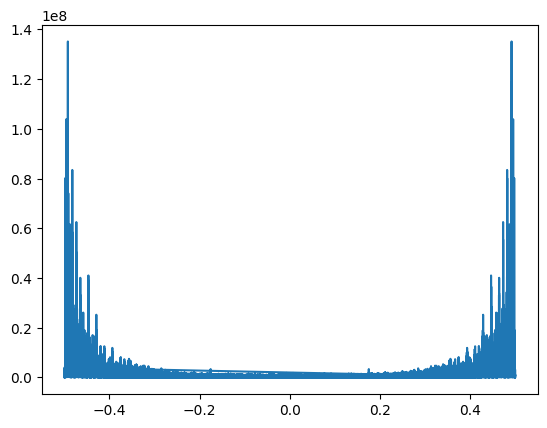

In [27]:
plt.plot(x_fft_freq, abs(Y1))

### Freq Changes

/home/edwmapa/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


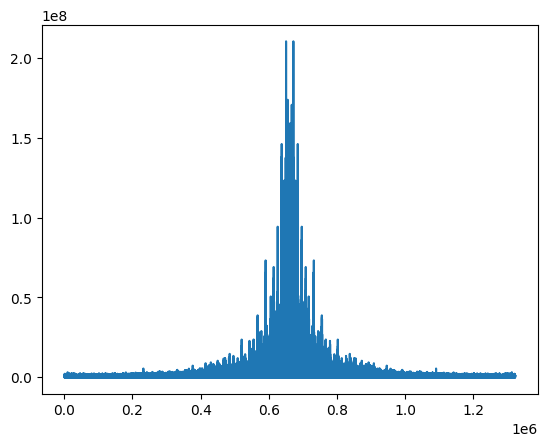

In [43]:
plt.plot(Y - Y1)

In [28]:
embedded_signal = ifft(ifftshift(Y1))
embedded_signal

wavfile.write('../../Outputs/py_out.wav', int(sample_rate), abs(embedded_signal))

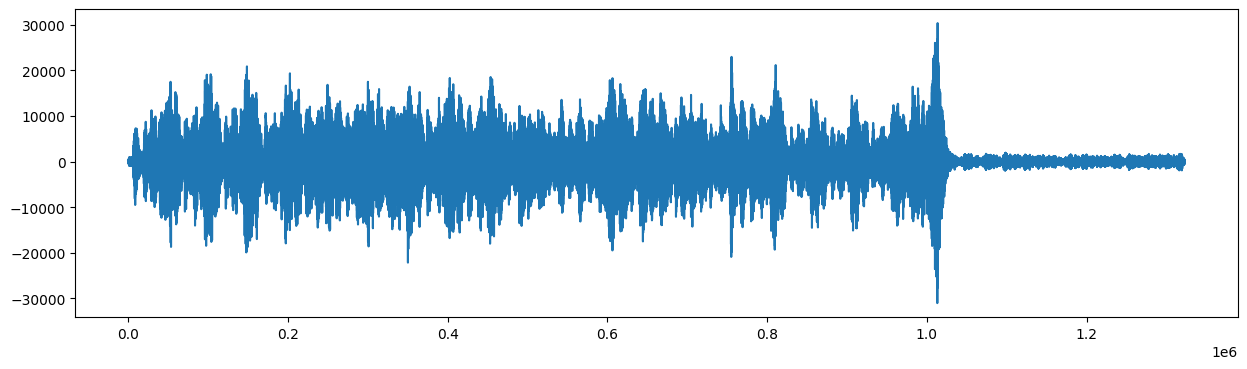

In [45]:
plt.figure(figsize=(15, 4))
plt.plot(embedded_signal)

In [46]:
wavfile.write('../../Outputs/out2.wav', sample_rate, embedded_signal.real / sample_rate) 